# Pendel med luftmotstand

<img src='pendel2.png'>


Vi har fra tidligere at $F_{D}$ er proporsjonal til 

$$F_{D}\,=\,{\tfrac {1}{2}}\,\rho \,C_{D}\,A\,v^{2}$$

Men for en enkel pendel med relativ lav fart kan vi si at kraften fra luftmotstanden på kula, $F_D$, er proporsjonal med farten. 

$$F_D\,= - \,{\tfrac {1}{2}}\,\rho \,C_{D}\,A\,\omega=- B\,\omega$$

Mekanikken sier oss at kraften som trekker pendelen langs banen mot likevektspunktet er

$$F_\theta = -mg\, \sin(\theta)$$

når vinkelutslaget er $\theta$. Kraftmomentet omkring opphengspunktet for pendelen med lengde $L$ er da:

$$\tau = -mg\,L\,\sin(\theta) - B\,\omega$$


Spinnsatsen anvendt omkring opphengspunktet gir:

$$\tau = I \omega^\prime$$

der $\alpha = \omega^\prime$ er vinkelakselerasjonen og $I$ er treghetsmomentet om aksen

$$I=mL^2$$

Vi ender da opp med den endelige differensialligningen:

$$mL^2 \omega^\prime = -mgL\,sin(\theta) - B\,\omega$$

$$\omega^\prime = -\frac{g}{L}\sin(\theta) - \frac{B\,\omega}{m}$$


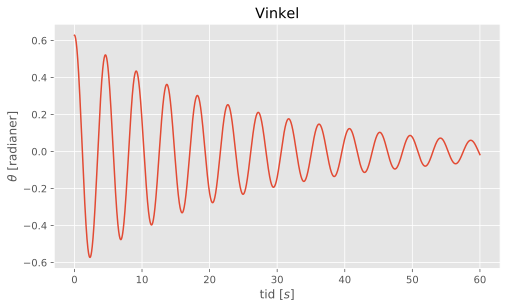

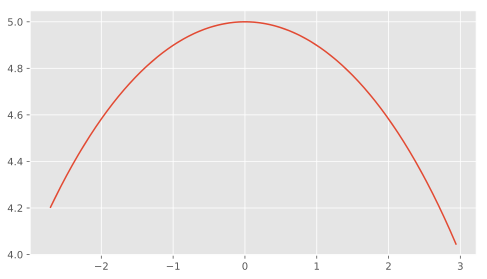

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# ----------------    Fysiske størelse  --------------------

g = 9.81                   # Gravitasjon [m/s^2]
m = 0.3                    # Massen til kula [kg]
L = 5                      # Lengden til snora
ρ = 1.2                    # Tettheten til lufta [kg/m^3]
C_d = 1.28                 # Dragkoofesienten 
A = 3.14*0.05**2           # Tversnitt til kula [m^2]
B = ρ*C_d*A*2              # Samler konstantene i B

# ----------------    Tidsintervaller  --------------------

T  = 60                    # Tid [s]
Δt = 0.0005                # Tidssteg [s]
N  = round(T/Δt)           # Antall tidssteg
x  = np.zeros(N)           # Posisjonsarray x-retning [m]
y  = np.zeros(N)           # Posisjonsarray y-retning [m]
ω  = np.zeros(N)           # Fartsarray x-retning [m/s]
θ  = np.zeros(N)           # Fartsarray y-retning [m/s]
t  = np.linspace(0, T, N)  # Tidsarray [s]


# ----------------  Startverdier  --------------------

ω[0] = 0
θ[0] = np.pi/5 
x[0] = L*np.sin(θ[0])
y[0] = L*np.cos(θ[0])

# ----------------  Eulers metode  --------------------

for i in range(N - 1):
    
    ω[i + 1] = ω[i]-g/L*np.sin(θ[i])*Δt - ω[i]*B*Δt/m
    θ[i + 1] = θ[i] + ω[i]*Δt
    
    x[i+1] = L*np.sin(θ[i+1])
    y[i+1] = L*np.cos(θ[i+1])
    

# -------------------  Plot  -------------------------
    
plt.rcParams['figure.figsize'] = (8, 4.5)
plt.style.use('ggplot')
plt.xlabel('tid $[s]$')     
plt.ylabel('$\\theta$ [radianer]')     
plt.title('Vinkel')          
plt.plot(t, θ)
plt.show()

plt.plot(x, y)
plt.show()
